<a href="https://colab.research.google.com/github/ChunTingShen/DS4B_project/blob/main/Sample_Harness_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions for final submission

Your final submission will be a Colab notebook that we can use to get your predictions on the test dataframe. Make sure that it can run as a standalone on Colab!

The only **mandatory** part of the homework is the harness function.
However, I am assuming you will need to download your models and python  packages so that you can run your code. Below are details on how to 
upload you models to Google Drive, download them and a sample of what your
harness function may look like. Test it out on your end and make sure that 
it:
1. Return probabilities (numbers between 0 and 1 for every entry in 
the holdout set
2. Runs in less than 15 minutes! 
If either of these conditions are not met you will lose points!


### Fit whatever models you like - done on your end

In [ ]:
from sklearn.linear_model import LinearRegression
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier 
import pickle
import pandas as pd


from joblib import dump, load

### YOUR FITTING CODE HERE

## Example workflow

### Put it on Google Drive

Upload the files to google drive, then download them using gdown as described in this stack overflow: https://stackoverflow.com/questions/25010369/wget-curl-large-file-from-google-drive

### Download models/preprocessors etc. from Google Drive

In [ ]:
## look here to see how you can download models from google drive
## https://stackoverflow.com/questions/25010369/wget-curl-large-file-from-google-drive
!pip install gdown


In [ ]:
#!gdown https://drive.google.com/uc?id=168DXXi3uX73vHErh-zpFUBhTNTtmqGlY
!gdown https://drive.google.com/uc?id=1kyY2gbYl_inOUn9dVYnS0bWMIS6Pf417   #gradient booster
!gdown https://drive.google.com/uc?id=16dTra-JXe0eJAg8vv5rf_PESGY4ZQ-5t   #bagging classifier

Downloading...
From: https://drive.google.com/uc?id=1kyY2gbYl_inOUn9dVYnS0bWMIS6Pf417
To: /content/team_mauve_model.sav
100% 134k/134k [00:00<00:00, 76.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=16dTra-JXe0eJAg8vv5rf_PESGY4ZQ-5t
To: /content/team_mauve_model_bc.sav
100% 8.39M/8.39M [00:00<00:00, 207MB/s]


### Install all packages that you need

In [ ]:
!pip install --force scikit-learn

## Run harness function on test dataframe

In [ ]:
#test_df = pd.DataFrame({"col1":[0,1],"col2":[0,1]})



In [ ]:
import joblib
import pandas as pd 
import numpy as np
from datetime import datetime


#Input:
#   test_df = holdout dataset
#   preprocess_params (optional) = params to pass to model.  
#     You may also store these in a file and read them in 
#     from the harness function if you perfer


def preprocess_params(test_df):

  colnames = ['year', 'cust_id', 'prod_id', 'manuf', 'price', 'dscnt_store',
        'home_is_rental', 'DayOfWeek', 'month', 'day', 'promo_duration',
        'promo_start', 'lnPrice', 'marital_status_Married',
        'marital_status_Single', 'category_Dairy, Juices & Snacks',
        'category_Flowers & Plants', 'category_Garden', 'category_Grocery',
        'category_Meat', 'category_Miscellaneous', 'category_Natural Products',
        'category_Packaged Meat', 'category_Pharmaceutical',
        'category_Prepared Food', 'category_Salads', 'category_Seafood',
        'category_Skin & Hair Care', 'category_Travel',
        'category_Vegetables (cut)', 'brand_type_Local', 'age_cohort_18_25',
        'age_cohort_26_35', 'age_cohort_36_45', 'age_cohort_46_55',
        'age_cohort_56_70', 'age_cohort_71', 'home_is_rental_0',
        'home_is_rental_1', 'n_family_1', 'n_family_2', 'n_family_3',
        'n_family_4', 'n_family_5', 'no_of_children_1', 'no_of_children_2',
        'no_of_children_3', 'income_range_1', 'income_range_2',
        'income_range_3', 'income_range_4', 'income_range_5', 'income_range_6',
        'income_range_7', 'income_range_8', 'income_range_9', 'income_range_10',
        'income_range_11', 'income_range_12', 'DOW_1', 'DOW_2', 'DOW_3',
        'DOW_4', 'DOW_5', 'DOW_6', 'c_type_Y']

  df_out = pd.DataFrame(columns=colnames)

  df = test_df

  df.dropna()
  df.drop_duplicates()


  df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
  df['start_date'] = pd.to_datetime(df['start_date'], format='%m/%d/%y')
  df['end_date'] = pd.to_datetime(df['end_date'], format='%m/%d/%y')

  ### add Day of Week (0-6):
  df['DayOfWeek'] = df['date'].dt.dayofweek
  df['month'] = df['date'].dt.month
  df['day'] = df['date'].dt.day  

  ####### Replace "Nan" to something else

  df['marital_status'] = df['marital_status'].replace(np.nan, -1) # replace no values as -1

  df['home_is_rental'] = df['home_is_rental'].replace(np.nan, -1)
  df['home_is_rental'] = df['home_is_rental'].astype(int)

  df['age_cohort'] = df['age_cohort'].replace(np.nan, -1)
  df['age_cohort'] = df['age_cohort'].replace("18-25", "18_25") 
  df['age_cohort'] = df['age_cohort'].replace("26-35", "26_35")
  df['age_cohort'] = df['age_cohort'].replace("36-45", "36_45")
  df['age_cohort'] = df['age_cohort'].replace("46-55", "46_55")
  df['age_cohort'] = df['age_cohort'].replace("56-70", "56_70")
  df['age_cohort'] = df['age_cohort'].replace("70+", "71")

  df['n_family'] = df['n_family'].replace(np.nan, -1)
  df['n_family'] = df['n_family'].replace("5+", 5)
  df['n_family'] = df['n_family'].astype(int)

  df['no_of_children'] = df['no_of_children'].replace(np.nan, -1) # if no response: label it as -1 
  df['no_of_children'] = df['no_of_children'].replace("3+", 3)
  df['no_of_children'] = df['no_of_children'].astype(int)

  df['income_range'] = df['income_range'].replace(np.nan, -1)
  df['income_range'] = df['income_range'].astype(int)

  # create promotion days:
  df["promo_duration"] = df['end_date'] - df['start_date']
  df["promo_duration"] = df["promo_duration"].dt.days

  df["promo_start"] = df['date'] - df['start_date']
  df["promo_start"] = df["promo_start"].dt.days

  df['lnPrice'] = np.log(df.price+1) 

  df = pd.concat([df, ((pd.get_dummies(df['marital_status'], drop_first=True, prefix = "marital_status")))], axis = 1, join = 'inner')
  df = pd.concat([df, ((pd.get_dummies(df['category'], drop_first=True, prefix = "category")))], axis = 1, join = 'inner')
  df = pd.concat([df, ((pd.get_dummies(df['brand_type'], drop_first=True, prefix = "brand_type")))], axis = 1, join = 'inner')
  df = pd.concat([df, ((pd.get_dummies(df['age_cohort'], drop_first=True, prefix = "age_cohort")))], axis = 1, join = 'inner')
  df = pd.concat([df, ((pd.get_dummies(df['home_is_rental'], drop_first=True, prefix = "home_is_rental")))], axis = 1, join = 'inner')
  df = pd.concat([df, ((pd.get_dummies(df['n_family'], drop_first=True, prefix = "n_family")))], axis = 1, join = 'inner')
  df = pd.concat([df, ((pd.get_dummies(df['no_of_children'], drop_first=True, prefix = "no_of_children")))], axis = 1, join = 'inner')
  df = pd.concat([df, ((pd.get_dummies(df['income_range'], drop_first=True, prefix = "income_range")))], axis = 1, join = 'inner')
  df = pd.concat([df, ((pd.get_dummies(df['DayOfWeek'], drop_first=True, prefix = "DOW")))], axis = 1, join = 'inner')
  df = pd.concat([df, ((pd.get_dummies(df['c_type'], drop_first=True, prefix = "c_type")))], axis = 1, join = 'inner')

  result = pd.merge(df_out, df, how="outer")
  result = result[colnames]
  result = result.replace(np.nan, 0)

  return result




def harness_function(test_df,preprocess_params=None):
  ## load model and preprocessors and whatever else you need
  #model = load('team_mauve.joblib.joblib')   
  ## process the data frame (WARNING ABOUT LEAKAGE HERE - 
  ## WE WILL LOOK AT YOUR CODE AND DEDUCT POINTS)
  ## Example: make sure you are only processing columns you would not 
  ## know at runtime
  ## Example: using summary stats of the test_df
  #predictor_cols = ["col1","col2"]
  ## Classify data
  #preds = model.predict_proba(test_df(predictor_cols))
  ## return probabilities

  #load_model = pickle.load(open('/content/team_mauve_model.sav', 'rb'))
  load_model = pickle.load(open('/content/team_mauve_model_bc.sav', 'rb'))

  pred = load_model.predict_proba(test_df)
  return pred

In [ ]:
test_df1 = pd.read_csv("/content/dataset.csv")

test_df1[:5]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,y_redeemed,year,date,cust_id,prod_id,manuf,brand_type,category,y_qty,...,c_type,start_date,end_date,redemption_id,age_cohort,marital_status,home_is_rental,n_family,no_of_children,income_range
0,0,0,2013,02/22/13,1489,34047,56,Local,Grocery,1,...,X,02/16/13,05/04/13,9,46-55,Married,0.0,2.0,NaN,3.0
1,1,0,2013,02/22/13,1489,35464,56,Local,Grocery,1,...,X,02/16/13,05/04/13,9,46-55,Married,0.0,2.0,NaN,3.0
2,2,0,2013,03/03/13,1489,34047,56,Local,Grocery,1,...,X,02/16/13,05/04/13,9,46-55,Married,0.0,2.0,NaN,3.0
3,3,0,2013,03/03/13,1489,33688,939,Established,Grocery,1,...,X,02/16/13,05/04/13,9,46-55,Married,0.0,2.0,NaN,3.0
4,4,0,2013,03/05/13,1489,34047,56,Local,Grocery,1,...,X,02/16/13,05/04/13,9,46-55,Married,0.0,2.0,NaN,3.0


# Testing section

In [ ]:

test_df1 = pd.read_csv("/content/dataset.csv")


test_df = pd.read_csv("/content/proj_training_data.csv")
test_df = test_df[:-100000]

inputdata = preprocess_params(test_df1)

final = harness_function(inputdata)

final[:10]



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
inputdata1 = test_df1.loc[[1]]
#print(inputdata1)

final = []

for i in range(10000):
  inputdata1 = test_df1.loc[[i]]
  inputdata = preprocess_params(inputdata1)
  temp = harness_function(inputdata)
  temp1 = temp[:, 1]
  final.append(temp1[0])


#final = harness_function(inputdata)#for i in range(10000):
final
#  inputdata = 

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [ ]:
actual = test_df1[:10000]

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.metrics import roc_auc_score, log_loss, balanced_accuracy_score, classification_report, confusion_matrix, average_precision_score
from sklearn.pipeline import make_pipeline
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.patches as mpatches

%matplotlib inline
sns.set(style='ticks', palette='Set2')


In [ ]:
#helper func to build graph
def plot_roc(fpr,tpr,roc_auc):
  plt.figure()
  lw = 2
  plt.plot(
      fpr,
      tpr,
      color="darkblue",
      lw=lw,
      label="ROC curve (area = %0.4f)" % roc_auc,
  )
  plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver operating characteristic")
  plt.legend(loc="lower right")
  plt.show()

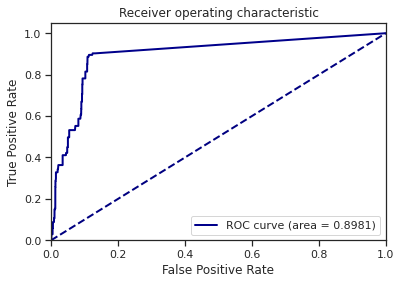

In [ ]:
pred = final[:, 1]
#act = test_df1['y_redeemed']
act = actual['y_redeemed']
fpr, tpr, _  = metrics.roc_curve(act, pred) ### use the roc_curve function
roc_auc           = metrics.auc(fpr, tpr) ### use the auc function


#model_logit_accuracy = metrics.accuracy_score(pred,act)
#print("Accuracy (sklearn):" , np.round(model_logit_accuracy, 5))

plot_roc(fpr,tpr,roc_auc)